### STEP1. 스티커 구하기 or 만들기

In [80]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


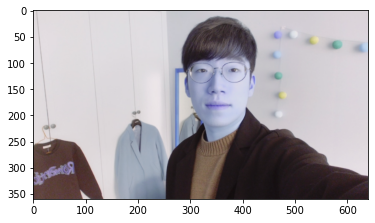

In [81]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

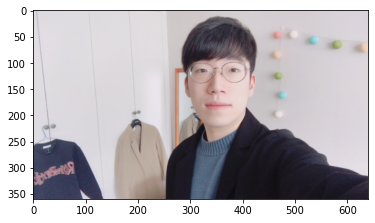

In [82]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### STEP2-1. 얼굴 검출(face detection) 

In [83]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [84]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(270, 64) (425, 219)]]


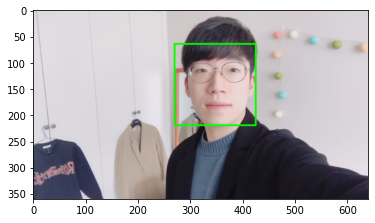

In [85]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### STEP2-2. 랜드마크 검출 하기 (face landmark)

In [86]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [87]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


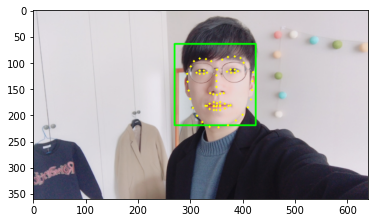

In [88]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step3. 스티커 적용 위치 확인하기

In [89]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[48][1] - landmark[2][1])*2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(350, 146)
(x,y) : (350,146)
(w,h) : (76,58)


In [90]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat1.jpeg'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)

(58, 76, 3)


In [91]:
refined_x = x - w // 2  # left
refined_y = y - h // 2    # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (312,117)


In [92]:
x_shape = img_sticker.shape[0]
y_shape = img_sticker.shape[1]
print('(x_shape,y_shape) : (%d,%d)'%(x_shape, y_shape))

(x_shape,y_shape) : (58,76)


In [93]:
sticker_area = img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

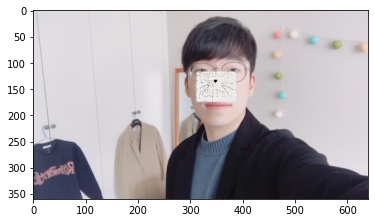

In [96]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 4. 스티커 적용하기

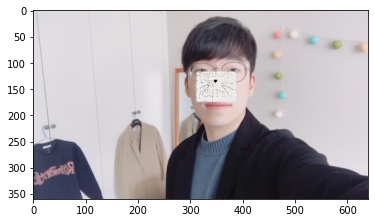

In [97]:
sticker_area = img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape]
img_bgr[refined_y:refined_y+x_shape, refined_x:refined_x+y_shape] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 5. 문제점 찾아보기

#### - 얼굴 각도에 따라 스티커가 어떻게 변해야 할까요?
#### - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
#### - 실행 속도가 중요할까요?
#### - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

### 느낀점 (회고)
고양이 수염 스티커를 만들어 보았다.LMS저자의 사진이 face detection이 잘 되어서 이용해 보았다. 고양이 수염 사진이 배경이 투명하지 않아서 하얗게 블러 처리 되어서 나온게 아쉽다. 